In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Data\monthly_milk_production.csv', parse_dates = True, index_col = 'Date')
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [10]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Date', length=168, freq=None)

<AxesSubplot:xlabel='Date'>

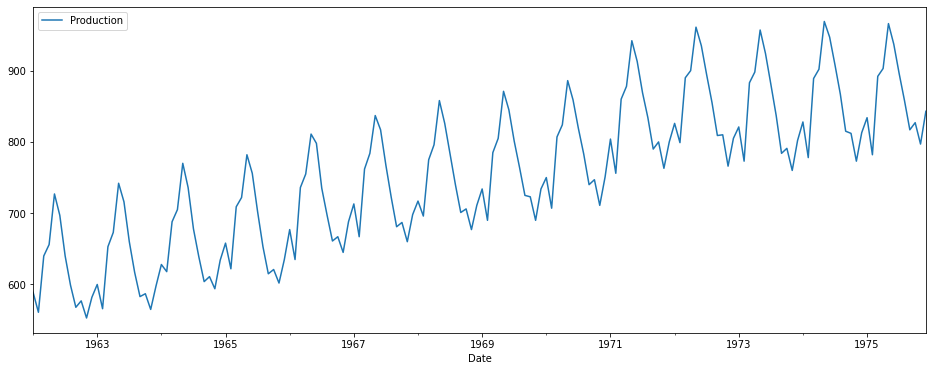

In [12]:
df.plot(figsize = (16,6)) # seasonality and upward trend present

In [21]:
df['Month'] = df.index.month

In [22]:
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [19]:
df['Month'] = df.index.strftime('%B')
df.head()

,Production,Month
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


<AxesSubplot:title={'center':'Production'}, xlabel='[Month]'>

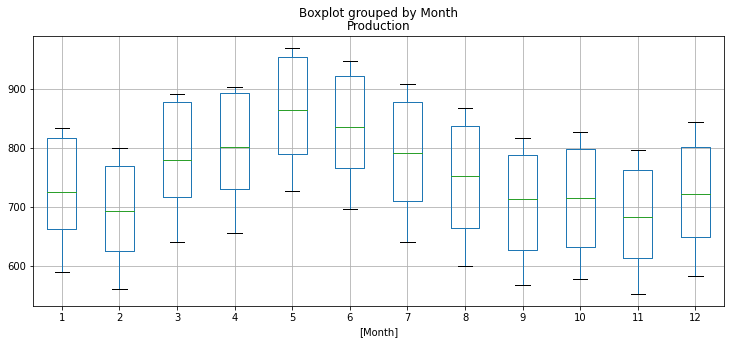

In [23]:
df.boxplot(by = 'Month', figsize = (12,5))

In [27]:
df = pd.read_csv(r'Data\UMTMVS.csv')
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [29]:
df.set_index('DATE', inplace = True)

In [32]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

<AxesSubplot:xlabel='DATE'>

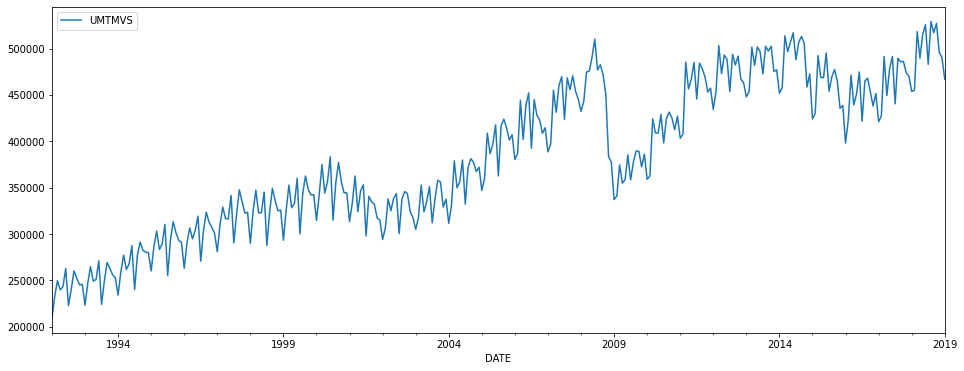

In [33]:
df.plot(figsize = (16,6))

In [34]:
(df.loc['2019-01-01'] - df.loc['2009-01-01'])/df.loc['2009-01-01']*100

UMTMVS    38.472149
dtype: float64

In [35]:
(df.loc['2009-01-01'] - df.loc['2008-01-01'])/df.loc['2008-01-01']*100

UMTMVS   -22.022775
dtype: float64

In [41]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [44]:
df.sort_values('UMTMVS', ascending = False).head()

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


In [46]:
(df.loc['2009-01-01'] - df.loc['2008-01-01'])

UMTMVS   -95206.0
dtype: float64

<AxesSubplot:xlabel='DATE'>

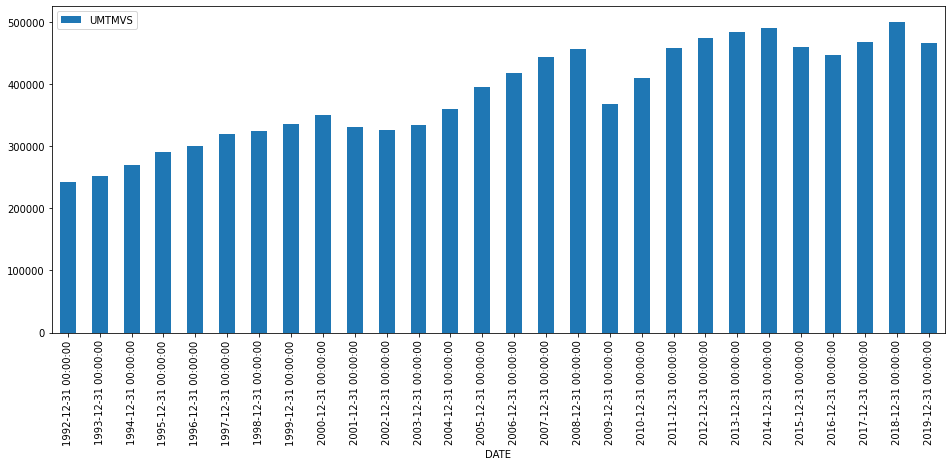

In [47]:
df.resample('Y').mean().plot.bar(figsize = (16,6))

In [55]:
yearly_data = df.resample('Y').mean()
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [52]:
yearly_data_shift = yearly_data.shift(1)
yearly_data_shift.head(3)

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333


In [53]:
change = yearly_data - yearly_data_shift
change.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333


In [54]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

<AxesSubplot:xlabel='DATE'>

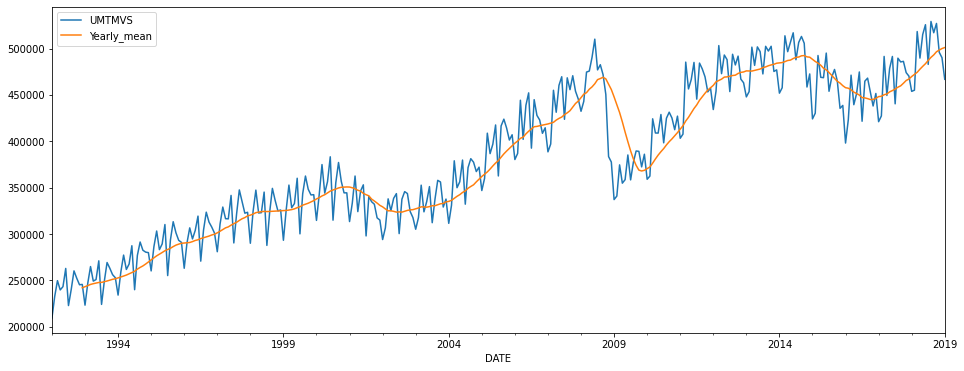

In [59]:
df['Yearly_mean'] = df['UMTMVS'].rolling(window = 12).mean()
df.plot(figsize = (16,6))

In [65]:
df_n = pd.read_csv(r'Data\UMTMVS.csv', index_col = 'DATE', parse_dates = True)
df_n.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [67]:
df_n.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

In [85]:
df_n2008 = df_n.loc['2008-01-01': '2008-12-01']
df_n2008

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0


In [86]:
df_n2008.idxmax() #peak value for this date

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [87]:
df_n2008.max()

UMTMVS    510081.0
dtype: float64

In [94]:
df_post_peak = df_n.loc['2008-06-01':]
df_post_peak

,UMTMVS
DATE,
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0
2008-10-01,450521.0
...,...
2018-09-01,516992.0
2018-10-01,527031.0
2018-11-01,495901.0


In [96]:
df_post_peak[df_post_peak >= 510081.0].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [98]:
df_n.loc['2008-06-01': '2014-03-01'] #It took 70 months to hit that peak again

,UMTMVS
DATE,
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0
2008-10-01,450521.0
...,...
2013-11-01,475238.0
2013-12-01,476957.0
2014-01-01,451848.0
